### Demographics and employment in the united states

In the wake of the Great Recession of 2009, there has been a good deal of focus on employment statistics, one of the most important metrics policymakers use to gauge the overall strength of the economy. In the United States, the government measures unemployment using the Current Population Survey (CPS), which collects demographic and employment information from a wide range of Americans each month. In this exercise, we will employ the topics reviewed in the lectures as well as a few new techniques using the September 2013 version of this rich, nationally representative dataset (available [online](http://thedataweb.rm.census.gov/ftp/cps_ftp.html)).

The observations in the dataset represent people surveyed in the September 2013 CPS who actually completed a survey. While the full dataset has 385 variables, in this exercise we will use a more compact version of the dataset, CPSData.csv, which has the following variables:

PeopleInHousehold: The number of people in the interviewee's household.

Region: The census region where the interviewee lives.

State: The state where the interviewee lives.

MetroAreaCode: A code that identifies the metropolitan area in which the interviewee lives (missing if the interviewee does not live in a metropolitan area). The mapping from codes to names of metropolitan areas is provided in the file MetroAreaCodes.csv.

Age: The age, in years, of the interviewee. 80 represents people aged 80-84, and 85 represents people aged 85 and higher.

Married: The marriage status of the interviewee.

Sex: The sex of the interviewee.

Education: The maximum level of education obtained by the interviewee.

Race: The race of the interviewee.

Hispanic: Whether the interviewee is of Hispanic ethnicity.

CountryOfBirthCode: A code identifying the country of birth of the interviewee. The mapping from codes to names of countries is provided in the file CountryCodes.csv.

Citizenship: The United States citizenship status of the interviewee.

EmploymentStatus: The status of employment of the interviewee.

Industry: The industry of employment of the interviewee (only available if they are employed).

#### Problem 1.1 - Loading and Summarizing the Dataset

Load the dataset from CPSData.csv into a data frame called CPS, and view the dataset with the summary() and str() commands.

How many interviewees are in the dataset?

In [2]:
CPS <- read.csv('CPSData.csv')

str(CPS)

summary(CPS)

'data.frame':	131302 obs. of  14 variables:
 $ PeopleInHousehold : int  1 3 3 3 3 3 3 2 2 2 ...
 $ Region            : Factor w/ 4 levels "Midwest","Northeast",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ State             : Factor w/ 51 levels "Alabama","Alaska",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ MetroAreaCode     : int  26620 13820 13820 13820 26620 26620 26620 33660 33660 26620 ...
 $ Age               : int  85 21 37 18 52 24 26 71 43 52 ...
 $ Married           : Factor w/ 5 levels "Divorced","Married",..: 5 3 3 3 5 3 3 1 1 3 ...
 $ Sex               : Factor w/ 2 levels "Female","Male": 1 2 1 2 1 2 2 1 2 2 ...
 $ Education         : Factor w/ 8 levels "Associate degree",..: 1 4 4 6 1 2 4 4 4 2 ...
 $ Race              : Factor w/ 6 levels "American Indian",..: 6 3 3 3 6 6 6 6 6 6 ...
 $ Hispanic          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CountryOfBirthCode: int  57 57 57 57 57 57 57 57 57 57 ...
 $ Citizenship       : Factor w/ 3 levels "Citizen, Native",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ EmploymentSt

 PeopleInHousehold       Region               State       MetroAreaCode  
 Min.   : 1.000    Midwest  :30684   California  :11570   Min.   :10420  
 1st Qu.: 2.000    Northeast:25939   Texas       : 7077   1st Qu.:21780  
 Median : 3.000    South    :41502   New York    : 5595   Median :34740  
 Mean   : 3.284    West     :33177   Florida     : 5149   Mean   :35075  
 3rd Qu.: 4.000                      Pennsylvania: 3930   3rd Qu.:41860  
 Max.   :15.000                      Illinois    : 3912   Max.   :79600  
                                     (Other)     :94069   NA's   :34238  
      Age                 Married          Sex       
 Min.   : 0.00   Divorced     :11151   Female:67481  
 1st Qu.:19.00   Married      :55509   Male  :63821  
 Median :39.00   Never Married:30772                 
 Mean   :38.83   Separated    : 2027                 
 3rd Qu.:57.00   Widowed      : 6505                 
 Max.   :85.00   NA's         :25338                 
                              

#### Problem 1.2 - Loading and Summarizing the Dataset

Among the interviewees with a value reported for the Industry variable, what is the most common industry of employment? Please enter the name exactly how you see it.

In [ ]:
Educational and health services

#### Problem 1.3 - Loading and Summarizing the Dataset

Recall from the homework assignment "The Analytical Detective" that you can call the sort() function on the output of the table() function to obtain a sorted breakdown of a variable. For instance, sort(table(CPS$Region)) sorts the regions by the number of interviewees from that region.

Which state has the fewest interviewees?

In [4]:
sort(table(CPS$State), decreasing = T)


          California                Texas             New York 
               11570                 7077                 5595 
             Florida         Pennsylvania             Illinois 
                5149                 3930                 3912 
                Ohio             Maryland            Minnesota 
                3678                 3200                 3139 
            Michigan             Virginia             Colorado 
                3063                 2953                 2925 
         Connecticut              Georgia            Wisconsin 
                2836                 2807                 2686 
       New Hampshire       North Carolina           New Jersey 
                2662                 2619                 2567 
                Iowa           Washington                Maine 
                2528                 2366                 2263 
            Delaware         Rhode Island             Missouri 
                2214                 22

Which state has the largest number of interviewees?

In [5]:
sort(table(CPS$State), decreasing = T)[1]

California 
     11570

#### Problem 1.4 - Loading and Summarizing the Dataset

What proportion of interviewees are citizens of the United States?

In [20]:
table(CPS$Citizenship)/nrow(CPS)


     Citizen, Native Citizen, Naturalized          Non-Citizen 
          0.88832615           0.05386818           0.05780567 

In [21]:
1 - table(CPS$Citizenship=='Non-Citizen')/nrow(CPS)


     FALSE       TRUE 
0.05780567 0.94219433 

In [22]:
table(CPS$Citizenship=='Non-Citizen')


 FALSE   TRUE 
123712   7590 

#### Problem 1.5 - Loading and Summarizing the Dataset

The CPS differentiates between race (with possible values American Indian, Asian, Black, Pacific Islander, White, or Multiracial) and ethnicity. A number of interviewees are of Hispanic ethnicity, as captured by the Hispanic variable. For which races are there at least 250 interviewees in the CPS dataset of Hispanic ethnicity? (Select all that apply.)

In [24]:
table(CPS$Hispanic, CPS$Race)

   
    American Indian Asian Black Multiracial Pacific Islander White
  0            1129  6407 13292        2449              541 89190
  1             304   113   621         448               77 16731

In [28]:
table(CPS$Hispanic, CPS$Race) > 250

,American Indian,Asian,Black,Multiracial,Pacific Islander,White
0,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
1,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE


#### Problem 2.1 - Evaluating Missing Values

Which variables have at least one interviewee with a missing (NA) value? (Select all that apply.)

In [35]:
apply(CPS, 2, function(col) sum(is.na(col)))

PeopleInHousehold             Region              State      MetroAreaCode 
                 0                  0                  0              34238 
               Age            Married                Sex          Education 
                 0              25338                  0              25338 
              Race           Hispanic CountryOfBirthCode        Citizenship 
                 0                  0                  0                  0 
  EmploymentStatus           Industry 
             25789              65060

#### Problem 2.2 - Evaluating Missing Values

Often when evaluating a new dataset, we try to identify if there is a pattern in the missing values in the dataset. We will try to determine if there is a pattern in the missing values of the Married variable. The function is.na(CPS$Married) returns a vector of TRUE/FALSE values for whether the Married variable is missing. We can see the breakdown of whether Married is missing based on the reported value of the Region variable with the function table(CPS$Region, is.na(CPS$Married)). Which is the most accurate:

In [36]:
table(CPS$Region, is.na(CPS$Married))

           
            FALSE  TRUE
  Midwest   24609  6075
  Northeast 21432  4507
  South     33535  7967
  West      26388  6789

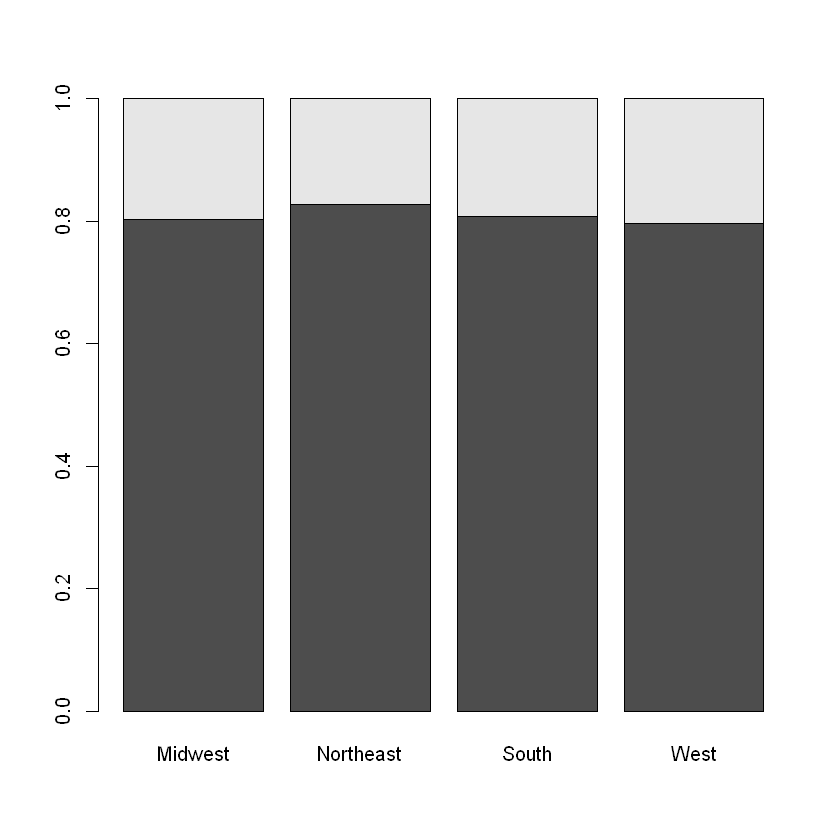

In [53]:
barplot(prop.table(table(is.na(CPS$Married), CPS$Region),margin=2 )  )

        
         FALSE  TRUE
  Female 55264 12217
  Male   50700 13121

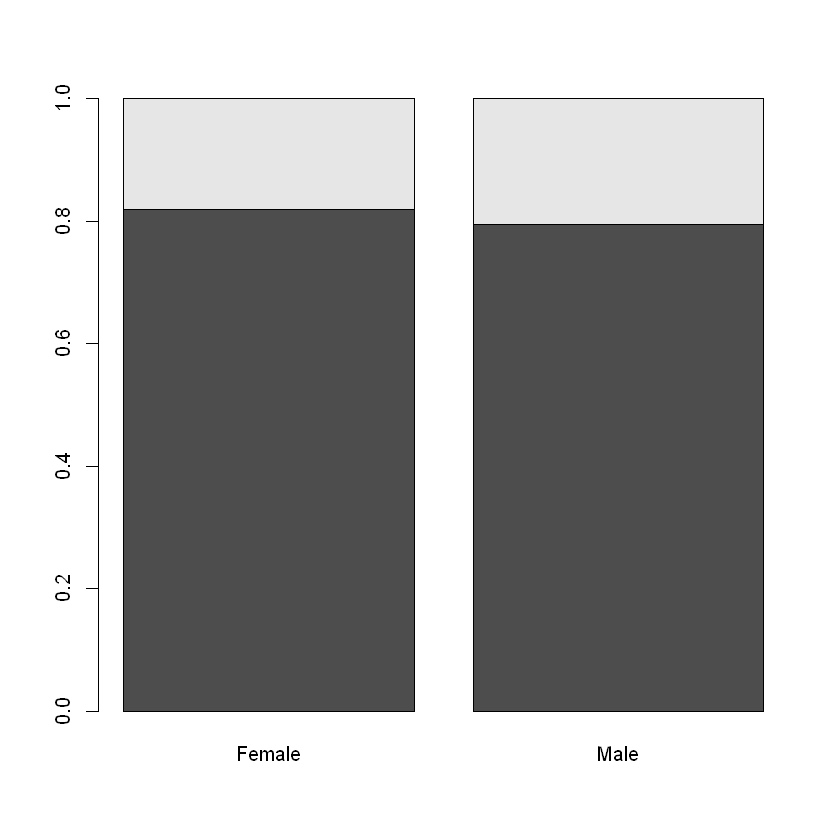

In [55]:
table(CPS$Sex, is.na(CPS$Married))
barplot(prop.table(table(is.na(CPS$Married), CPS$Sex),margin=2 )  )

In [60]:
table(CPS$Age, is.na(CPS$Married))


    
     FALSE TRUE
  0      0 1283
  1      0 1559
  2      0 1574
  3      0 1693
  4      0 1695
  5      0 1795
  6      0 1721
  7      0 1681
  8      0 1729
  9      0 1748
  10     0 1750
  11     0 1721
  12     0 1797
  13     0 1802
  14     0 1790
  15  1795    0
  16  1751    0
  17  1764    0
  18  1596    0
  19  1517    0
  20  1398    0
  21  1525    0
  22  1536    0
  23  1638    0
  24  1627    0
  25  1604    0
  26  1643    0
  27  1657    0
  28  1736    0
  29  1645    0
  30  1854    0
  31  1762    0
  32  1790    0
  33  1804    0
  34  1653    0
  35  1716    0
  36  1663    0
  37  1531    0
  38  1530    0
  39  1542    0
  40  1571    0
  41  1673    0
  42  1711    0
  43  1819    0
  44  1764    0
  45  1749    0
  46  1665    0
  47  1647    0
  48  1791    0
  49  1989    0
  50  1966    0
  51  1931    0
  52  1935    0
  53  1994    0
  54  1912    0
  55  1895    0
  56  1935    0
  57  1827    0
  58  1874    0
  59  1758    0
  60  1746    0
  6

In [62]:
table(CPS$Age >14, is.na(CPS$Married))

       
         FALSE   TRUE
  FALSE      0  25338
  TRUE  105964      0

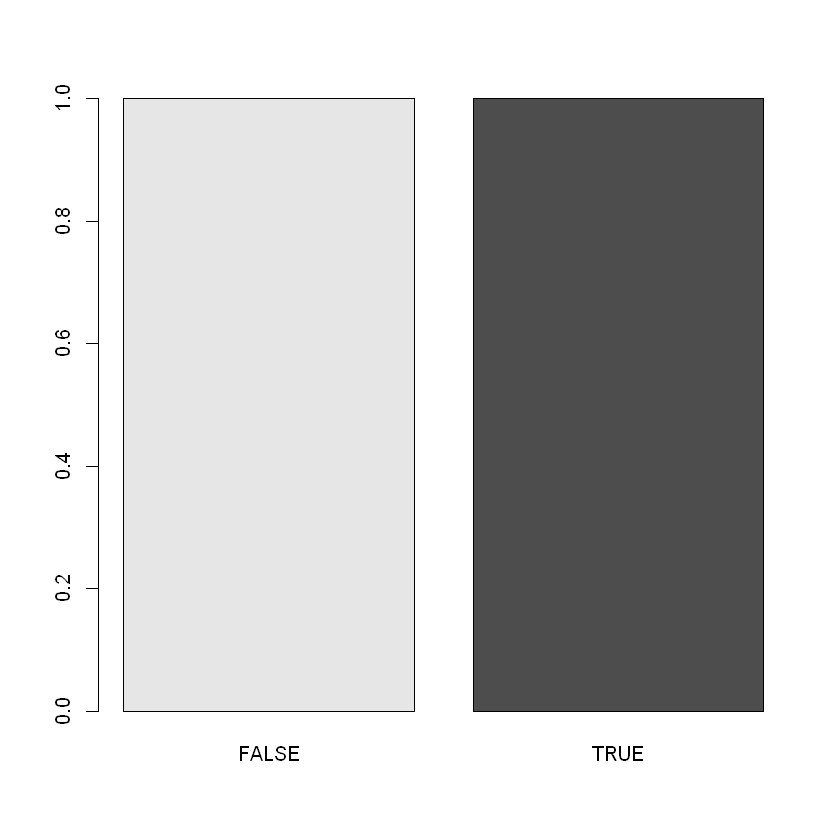

In [63]:
barplot(prop.table(table(is.na(CPS$Married), CPS$Age >14),margin=2 )  )

                      
                       FALSE  TRUE
  Citizen, Native      91956 24683
  Citizen, Naturalized  6910   163
  Non-Citizen           7098   492

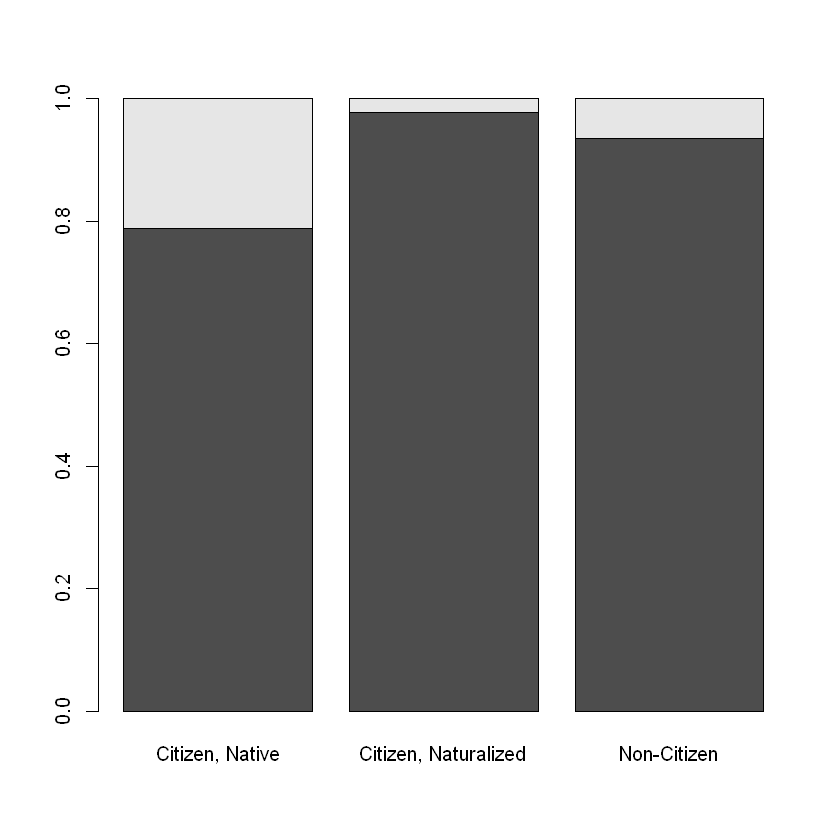

In [61]:
table(CPS$Citizenship, is.na(CPS$Married))
barplot(prop.table(table(is.na(CPS$Married), CPS$Citizenship),margin=2 )  )

#### Problem 2.3 - Evaluating Missing Values

As mentioned in the variable descriptions, MetroAreaCode is missing if an interviewee does not live in a metropolitan area. Using the same technique as in the previous question, answer the following questions about people who live in non-metropolitan areas.

How many states had all interviewees living in a non-metropolitan area (aka they have a missing MetroAreaCode value)? For this question, treat the District of Columbia as a state (even though it is not technically a state).

In [66]:
table(CPS$State , is.na(CPS$MetroAreaCode))

                      
                       FALSE  TRUE
  Alabama               1020   356
  Alaska                   0  1590
  Arizona               1327   201
  Arkansas               724   697
  California           11333   237
  Colorado              2545   380
  Connecticut           2593   243
  Delaware              1696   518
  District of Columbia  1791     0
  Florida               4947   202
  Georgia               2250   557
  Hawaii                1576   523
  Idaho                  761   757
  Illinois              3473   439
  Indiana               1420   584
  Iowa                  1297  1231
  Kansas                1234   701
  Kentucky               908   933
  Louisiana             1216   234
  Maine                  909  1354
  Maryland              2978   222
  Massachusetts         1858   129
  Michigan              2517   546
  Minnesota             2150   989
  Mississippi            376   854
  Missouri              1440   705
  Montana                199  10

How many states had all interviewees living in a metropolitan area? Again, treat the District of Columbia as a state.

#### Problem 2.4 - Evaluating Missing Values

Which region of the United States has the largest proportion of interviewees living in a non-metropolitan area?

In [69]:
prop.table(table(CPS$Region , is.na(CPS$MetroAreaCode)), margin=1 )

           
                FALSE      TRUE
  Midwest   0.6521314 0.3478686
  Northeast 0.7837619 0.2162381
  South     0.7621560 0.2378440
  West      0.7563372 0.2436628

#### Problem 2.5 - Evaluating Missing Values

While we were able to use the table() command to compute the proportion of interviewees from each region not living in a metropolitan area, it was somewhat tedious (it involved manually computing the proportion for each region) and isn't something you would want to do if there were a larger number of options. It turns out there is a less tedious way to compute the proportion of values that are TRUE. The mean() function, which takes the average of the values passed to it, will treat TRUE as 1 and FALSE as 0, meaning it returns the proportion of values that are true. For instance, mean(c(TRUE, FALSE, TRUE, TRUE)) returns 0.75. Knowing this, use tapply() with the mean function to answer the following questions:

Which state has a proportion of interviewees living in a non-metropolitan area closest to 30%?

In [70]:
tapply(is.na(CPS$MetroAreaCode) , CPS$State, mean )

Alabama               Alaska              Arizona 
          0.25872093           1.00000000           0.13154450 
            Arkansas           California             Colorado 
          0.49049965           0.02048401           0.12991453 
         Connecticut             Delaware District of Columbia 
          0.08568406           0.23396567           0.00000000 
             Florida              Georgia               Hawaii 
          0.03923092           0.19843249           0.24916627 
               Idaho             Illinois              Indiana 
          0.49868248           0.11221881           0.29141717 
                Iowa               Kansas             Kentucky 
          0.48694620           0.36227390           0.50678979 
           Louisiana                Maine             Maryland 
          0.16137931           0.59832081           0.06937500 
       Massachusetts             Michigan            Minnesota 
          0.06492199           0.17825661           0.31506849 
         Mississippi             Missouri              Montana 
          0.69430894           0.32867133           0.83607908 
            Nebraska               Nevada        New Hampshire 
          0.58132376           0.13308190           0.56874530 
          New Jersey           New Mexico             New York 
          0.00000000           0.24500907           0.08060769 
      North Carolina         North Dakota                 Ohio 
          0.37304315           0.73738602           0.25122349 
            Oklahoma               Oregon         Pennsylvania 
          0.32764281           0.21821925           0.17430025 
        Rhode Island       South Carolina         South Dakota 
          0.00000000           0.31302774           0.70250000 
           Tennessee                Texas                 Utah 
          0.35594170           0.14370496           0.21009772 
             Vermont             Virginia           Washington 
          0.65238095           0.19844226           0.18131868 
       West Virginia            Wisconsin              Wyoming 
          0.75585522           0.29932986           1.00000000

Which state has the largest proportion of non-metropolitan interviewees, ignoring states where all interviewees were non-metropolitan?

#### Problem 3.1 - Integrating Metropolitan Area Data

Codes like MetroAreaCode and CountryOfBirthCode are a compact way to encode factor variables with text as their possible values, and they are therefore quite common in survey datasets. In fact, all but one of the variables in this dataset were actually stored by a numeric code in the original CPS datafile.

When analyzing a variable stored by a numeric code, we will often want to convert it into the values the codes represent. To do this, we will use a dictionary, which maps the the code to the actual value of the variable. We have provided dictionaries MetroAreaCodes.csv and CountryCodes.csv, which respectively map MetroAreaCode and CountryOfBirthCode into their true values. Read these two dictionaries into data frames MetroAreaMap and CountryMap.

How many observations (codes for metropolitan areas) are there in MetroAreaMap?

In [71]:
MetroAreaMap <- read.csv('MetroAreaCodes.csv')
str(MetroAreaMap)

'data.frame':	271 obs. of  2 variables:
 $ Code     : int  460 3000 3160 3610 3720 6450 10420 10500 10580 10740 ...
 $ MetroArea: Factor w/ 271 levels "Akron, OH","Albany-Schenectady-Troy, NY",..: 12 92 97 117 122 195 1 3 2 4 ...


How many observations (codes for countries) are there in CountryMap?

In [72]:
CountryMap <- read.csv('CountryCodes.csv')
str(CountryMap)

'data.frame':	149 obs. of  2 variables:
 $ Code   : int  57 66 73 78 96 100 102 103 104 105 ...
 $ Country: Factor w/ 149 levels "Afghanistan",..: 139 57 105 135 97 3 11 18 24 37 ...


#### Problem 3.2 - Integrating Metropolitan Area Data

To merge in the metropolitan areas, we want to connect the field MetroAreaCode from the CPS data frame with the field Code in MetroAreaMap. The following command merges the two data frames on these columns, overwriting the CPS data frame with the result:

CPS = merge(CPS, MetroAreaMap, by.x="MetroAreaCode", by.y="Code", all.x=TRUE)

The first two arguments determine the data frames to be merged (they are called "x" and "y", respectively, in the subsequent parameters to the merge function). by.x="MetroAreaCode" means we're matching on the MetroAreaCode variable from the "x" data frame (CPS), while by.y="Code" means we're matching on the Code variable from the "y" data frame (MetroAreaMap). Finally, all.x=TRUE means we want to keep all rows from the "x" data frame (CPS), even if some of the rows' MetroAreaCode doesn't match any codes in MetroAreaMap (for those familiar with database terminology, this parameter makes the operation a left outer join instead of an inner join).

Review the new version of the CPS data frame with the summary() and str() functions. What is the name of the variable that was added to the data frame by the merge() operation?

In [73]:
CPS = merge(CPS, MetroAreaMap, by.x="MetroAreaCode", by.y="Code", all.x=TRUE)



In [74]:
summary(CPS)
str(CPS)

 MetroAreaCode   PeopleInHousehold       Region               State      
 Min.   :10420   Min.   : 1.000    Midwest  :30684   California  :11570  
 1st Qu.:21780   1st Qu.: 2.000    Northeast:25939   Texas       : 7077  
 Median :34740   Median : 3.000    South    :41502   New York    : 5595  
 Mean   :35075   Mean   : 3.284    West     :33177   Florida     : 5149  
 3rd Qu.:41860   3rd Qu.: 4.000                      Pennsylvania: 3930  
 Max.   :79600   Max.   :15.000                      Illinois    : 3912  
 NA's   :34238                                       (Other)     :94069  
      Age                 Married          Sex       
 Min.   : 0.00   Divorced     :11151   Female:67481  
 1st Qu.:19.00   Married      :55509   Male  :63821  
 Median :39.00   Never Married:30772                 
 Mean   :38.83   Separated    : 2027                 
 3rd Qu.:57.00   Widowed      : 6505                 
 Max.   :85.00   NA's         :25338                 
                              

'data.frame':	131302 obs. of  15 variables:
 $ MetroAreaCode     : int  10420 10420 10420 10420 10420 10420 10420 10420 10420 10420 ...
 $ PeopleInHousehold : int  4 4 2 4 1 3 4 4 2 3 ...
 $ Region            : Factor w/ 4 levels "Midwest","Northeast",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ State             : Factor w/ 51 levels "Alabama","Alaska",..: 36 36 36 36 36 36 36 36 36 36 ...
 $ Age               : int  2 9 73 40 63 19 30 6 60 32 ...
 $ Married           : Factor w/ 5 levels "Divorced","Married",..: NA NA 2 2 3 3 2 NA 2 2 ...
 $ Sex               : Factor w/ 2 levels "Female","Male": 2 2 1 1 2 1 1 1 1 2 ...
 $ Education         : Factor w/ 8 levels "Associate degree",..: NA NA 8 4 6 4 2 NA 4 4 ...
 $ Race              : Factor w/ 6 levels "American Indian",..: 6 6 6 6 6 6 2 6 6 6 ...
 $ Hispanic          : int  0 0 0 0 0 0 0 1 0 0 ...
 $ CountryOfBirthCode: int  57 57 57 362 57 57 203 57 57 57 ...
 $ Citizenship       : Factor w/ 3 levels "Citizen, Native",..: 1 1 1 2 1 1 3 1 1 1 ...


How many interviewees have a missing value for the new metropolitan area variable? Note that all of these interviewees would have been removed from the merged data frame if we did not include the all.x=TRUE parameter.

#### Problem 3.3 - Integrating Metropolitan Area Data

Which of the following metropolitan areas has the largest number of interviewees?

In [77]:
head(sort(table(CPS$MetroArea), decreasing = T), 20)


New York-Northern New Jersey-Long Island, NY-NJ-PA 
                                              5409 
      Washington-Arlington-Alexandria, DC-VA-MD-WV 
                                              4177 
              Los Angeles-Long Beach-Santa Ana, CA 
                                              4102 
          Philadelphia-Camden-Wilmington, PA-NJ-DE 
                                              2855 
               Chicago-Naperville-Joliet, IN-IN-WI 
                                              2772 
              Providence-Fall River-Warwick, MA-RI 
                                              2284 
                    Boston-Cambridge-Quincy, MA-NH 
                                              2229 
            Minneapolis-St Paul-Bloomington, MN-WI 
                                              1942 
                   Dallas-Fort Worth-Arlington, TX 
                                              1863 
                    Houston-Baytown-Sugar Land, TX 
           

#### Problem 3.4 - Integrating Metropolitan Area Data

Which metropolitan area has the highest proportion of interviewees of Hispanic ethnicity? Hint: Use tapply() with mean, as in the previous subproblem. Calling sort() on the output of tapply() could also be helpful here.

In [81]:
head(sort(tapply(CPS$Hispanic, CPS$MetroArea, mean), decreasing = T), 10)

Laredo, TX McAllen-Edinburg-Pharr, TX 
                 0.9662921                  0.9487179 
 Brownsville-Harlingen, TX                El Paso, TX 
                 0.7974684                  0.7909836 
             El Centro, CA            San Antonio, TX 
                 0.6868687                  0.6441516 
                Madera, CA         Corpus Christi, TX 
                 0.6140351                  0.6060606 
                Merced, CA                Salinas, CA 
                 0.5660377                  0.5576923

#### Problem 3.5 - Integrating Metropolitan Area Data

Remembering that CPS$Race == "Asian" returns a TRUE/FALSE vector of whether an interviewee is Asian, determine the number of metropolitan areas in the United States from which at least 20% of interviewees are Asian.

In [83]:
head(sort(tapply(CPS$Race == "Asian", CPS$MetroArea, mean), decreasing = T), 10)

Honolulu, HI     San Francisco-Oakland-Fremont, CA 
                            0.5019036                             0.2467532 
   San Jose-Sunnyvale-Santa Clara, CA                 Vallejo-Fairfield, CA 
                            0.2417910                             0.2030075 
                           Fresno, CA                     Warner Robins, GA 
                            0.1848185                             0.1666667 
                         Stockton, CA                     Atlantic City, NJ 
                            0.1554404                             0.1441441 
Sacramento-Arden-Arcade-Roseville, CA     San Diego-Carlsbad-San Marcos, CA 
                            0.1424288                             0.1422271

In [84]:
sum( sort(tapply(CPS$Race == "Asian", CPS$MetroArea, mean), decreasing = T) > 0.2)

[1] 4

#### Problem 3.6 - Integrating Metropolitan Area Data

Normally, we would look at the sorted proportion of interviewees from each metropolitan area who have not received a high school diploma with the command:

sort(tapply(CPS$Education == "No high school diploma", CPS$MetroArea, mean))

However, none of the interviewees aged 14 and younger have an education value reported, so the mean value is reported as NA for each metropolitan area. To get mean (and related functions, like sum) to ignore missing values, you can pass the parameter na.rm=TRUE. Passing na.rm=TRUE to the tapply function, determine which metropolitan area has the smallest proportion of interviewees who have received no high school diploma.

In [86]:
head(sort(tapply(CPS$Education == "No high school diploma", CPS$MetroArea, mean, na.rm=T)), 10)

Iowa City, IA                 Bowling Green, KY 
                       0.02912621                        0.03703704 
            Kalamazoo-Portage, MI              Champaign-Urbana, IL 
                       0.05050505                        0.05154639 
         Bremerton-Silverdale, WA                      Lawrence, KS 
                       0.05405405                        0.05952381 
            Bloomington-Normal IL                  Jacksonville, NC 
                       0.06060606                        0.06122449 
                   Eau Claire, WI Palm Bay-Melbourne-Titusville, FL 
                       0.06250000                        0.06666667

#### Problem 4.1 - Integrating Country of Birth Data

Just as we did with the metropolitan area information, merge in the country of birth information from the CountryMap data frame, replacing the CPS data frame with the result. If you accidentally overwrite CPS with the wrong values, remember that you can restore it by re-loading the data frame from CPSData.csv and then merging in the metropolitan area information using the command provided in the previous subproblem.

What is the name of the variable added to the CPS data frame by this merge operation?

In [87]:
CountryMap <- read.csv('CountryCodes.csv')
str(CountryMap)

'data.frame':	149 obs. of  2 variables:
 $ Code   : int  57 66 73 78 96 100 102 103 104 105 ...
 $ Country: Factor w/ 149 levels "Afghanistan",..: 139 57 105 135 97 3 11 18 24 37 ...


In [89]:
str(CPS)

'data.frame':	131302 obs. of  15 variables:
 $ MetroAreaCode     : int  10420 10420 10420 10420 10420 10420 10420 10420 10420 10420 ...
 $ PeopleInHousehold : int  4 4 2 4 1 3 4 4 2 3 ...
 $ Region            : Factor w/ 4 levels "Midwest","Northeast",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ State             : Factor w/ 51 levels "Alabama","Alaska",..: 36 36 36 36 36 36 36 36 36 36 ...
 $ Age               : int  2 9 73 40 63 19 30 6 60 32 ...
 $ Married           : Factor w/ 5 levels "Divorced","Married",..: NA NA 2 2 3 3 2 NA 2 2 ...
 $ Sex               : Factor w/ 2 levels "Female","Male": 2 2 1 1 2 1 1 1 1 2 ...
 $ Education         : Factor w/ 8 levels "Associate degree",..: NA NA 8 4 6 4 2 NA 4 4 ...
 $ Race              : Factor w/ 6 levels "American Indian",..: 6 6 6 6 6 6 2 6 6 6 ...
 $ Hispanic          : int  0 0 0 0 0 0 0 1 0 0 ...
 $ CountryOfBirthCode: int  57 57 57 362 57 57 203 57 57 57 ...
 $ Citizenship       : Factor w/ 3 levels "Citizen, Native",..: 1 1 1 2 1 1 3 1 1 1 ...


In [90]:
CPS = merge(CPS, CountryMap, by.x="CountryOfBirthCode", by.y="Code", all.x=TRUE)
str(CPS)

'data.frame':	131302 obs. of  16 variables:
 $ CountryOfBirthCode: int  57 57 57 57 57 57 57 57 57 57 ...
 $ MetroAreaCode     : int  10420 71650 10420 10420 10420 10420 10420 10420 10420 10420 ...
 $ PeopleInHousehold : int  2 4 5 2 2 3 1 3 4 4 ...
 $ Region            : Factor w/ 4 levels "Midwest","Northeast",..: 1 2 1 1 1 1 1 1 1 1 ...
 $ State             : Factor w/ 51 levels "Alabama","Alaska",..: 36 30 36 36 36 36 36 36 36 36 ...
 $ Age               : int  73 5 10 30 30 0 34 32 6 9 ...
 $ Married           : Factor w/ 5 levels "Divorced","Married",..: 2 NA NA 2 2 NA 1 2 NA NA ...
 $ Sex               : Factor w/ 2 levels "Female","Male": 1 1 1 1 1 2 2 2 1 2 ...
 $ Education         : Factor w/ 8 levels "Associate degree",..: 8 NA NA 1 2 NA 4 4 NA NA ...
 $ Race              : Factor w/ 6 levels "American Indian",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ Hispanic          : int  0 0 0 0 0 0 0 0 1 0 ...
 $ Citizenship       : Factor w/ 3 levels "Citizen, Native",..: 1 1 1 1 1 1 1 1 1 1 ...

How many interviewees have a missing value for the new country of birth variable?

In [91]:
sum(is.na(CPS$Country))

[1] 176

#### Problem 4.2 - Integrating Country of Birth Data

Among all interviewees born outside of North America, which country was the most common place of birth?

In [94]:
head(sort(table(CPS$Country), decreasing = T) , 10)


United States        Mexico   Philippines         India         China 
       115063          3921           839           770           581 
  Puerto Rico   El Salvador       Vietnam       Germany          Cuba 
          518           477           458           438           426 

#### Problem 4.3 - Integrating Country of Birth Data

What proportion of the interviewees from the "New York-Northern New Jersey-Long Island, NY-NJ-PA" metropolitan area have a country of birth that is not the United States? For this computation, don't include people from this metropolitan area who have a missing country of birth.

In [103]:
table( CPS$MetroArea=='New York-Northern New Jersey-Long Island, NY-NJ-PA' , CPS$Country!='United States')

       
        FALSE  TRUE
  FALSE 78757 12744
  TRUE   3736  1668

In [105]:
prop.table(table( CPS$MetroArea=='New York-Northern New Jersey-Long Island, NY-NJ-PA' , CPS$Country!='United States'), margin=1)

       
            FALSE      TRUE
  FALSE 0.8607228 0.1392772
  TRUE  0.6913397 0.3086603

#### Problem 4.4 - Integrating Country of Birth Data

Which metropolitan area has the largest number (note -- not proportion) of interviewees with a country of birth in India? Hint -- remember to include na.rm=TRUE if you are using tapply() to answer this question.

In [108]:
head(sort(tapply(CPS$Country == "India", CPS$MetroArea, sum, na.rm=T), decreasing = T), 10)

New York-Northern New Jersey-Long Island, NY-NJ-PA 
                                                96 
      Washington-Arlington-Alexandria, DC-VA-MD-WV 
                                                50 
          Philadelphia-Camden-Wilmington, PA-NJ-DE 
                                                32 
               Chicago-Naperville-Joliet, IN-IN-WI 
                                                31 
                        Detroit-Warren-Livonia, MI 
                                                30 
                Atlanta-Sandy Springs-Marietta, GA 
                                                27 
                 San Francisco-Oakland-Fremont, CA 
                                                27 
          Hartford-West Hartford-East Hartford, CT 
                                                26 
            Minneapolis-St Paul-Bloomington, MN-WI 
                                                23 
              Los Angeles-Long Beach-Santa Ana, CA 
                                                19

In Brazil?

In [109]:
head(sort(tapply(CPS$Country == "Brazil", CPS$MetroArea, sum, na.rm=T), decreasing = T), 10)

Boston-Cambridge-Quincy, MA-NH 
                                                18 
             Miami-Fort Lauderdale-Miami Beach, FL 
                                                16 
              Los Angeles-Long Beach-Santa Ana, CA 
                                                 9 
      Washington-Arlington-Alexandria, DC-VA-MD-WV 
                                                 8 
                   Bridgeport-Stamford-Norwalk, CT 
                                                 7 
New York-Northern New Jersey-Long Island, NY-NJ-PA 
                                                 7 
                 San Francisco-Oakland-Fremont, CA 
                                                 6 
                                       Danbury, CT 
                                                 5 
               Davenport-Moline-Rock Island, IA-IL 
                                                 4 
          Philadelphia-Camden-Wilmington, PA-NJ-DE 
                                                 4

In Somalia?

In [110]:
head(sort(tapply(CPS$Country == "Somalia", CPS$MetroArea, sum, na.rm=T), decreasing = T), 10)

Minneapolis-St Paul-Bloomington, MN-WI            Phoenix-Mesa-Scottsdale, AZ 
                                    17                                      7 
           Seattle-Tacoma-Bellevue, WA                          St. Cloud, MN 
                                     7                                      7 
                          Columbus, OH                           Fargo, ND-MN 
                                     5                                      5 
       Burlington-South Burlington, VT            Portland-South Portland, ME 
                                     3                                      3 
   Portland-Vancouver-Beaverton, OR-WA         Houston-Baytown-Sugar Land, TX 
                                     3                                      2